In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec as mpgs
import matplotlib as mpl
import skimage.restoration as skr
import numpy as np
import hdf5storage as h5
import matplotlib_scalebar.scalebar as mpss
import matplotlib.offsetbox as mploff
import math
import scipy.ndimage as scnd
import stemtool as st
%matplotlib inline
plt.rcParams['image.cmap'] = 'magma'
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'figure.autolayout': True})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib.colors import LinearSegmentedColormap as LSC
lin_burd = LSC.from_list('list', [(0, 35/255, 156/255), (0.95,0.95, 0.95),(249/255,56/255,34/255)], N=256)

In [15]:
st.tic()
datRhPt = h5.loadmat('/Users/7dm/Documents/4D-STEM Strain Paper/Rh Pt/Strain GPA/RhPtThick.mat')
st.toc()

Elapsed time: 10.156587 seconds.



In [16]:
st.tic()
json1 = '/Users/7dm/Documents/4D-STEM Strain Paper/Rh Pt/Strain GPA/Particle1_ACSTEM_00.json'
json2 = '/Users/7dm/Documents/4D-STEM Strain Paper/Rh Pt/Strain GPA/Particle2_ACSTEM_00.json'
with open(json1) as json_1:
    info_1 = json.load(json_1)
with open(json2) as json_2:
    info_2 = json.load(json_2)
st.toc()

Elapsed time: 0.001586 seconds.



In [17]:
calib1 = info_1['spatial_calibrations'][0]['scale']
calib1_units = info_1['spatial_calibrations'][0]['units']

In [18]:
datRhPt.keys()

dict_keys(['particle1_00', 'particle1_90', 'particle1_SP', 'particle1_im', 'particle2_00', 'particle2_90', 'particle2_SP', 'particle2_im'])

In [19]:
image00 = datRhPt['particle1_00']
image90 = datRhPt['particle1_90']
imageDC = datRhPt['particle1_im']

To ensure only the nanoparticle is picked, we will do a digital selected area electron diffraction - we will pick two diffraction spots and then mask the image so that we will analyze only the image where the diffraction spots came from.

In [20]:
imageDC = np.rot90(imageDC)
imageDC.shape

(1970, 1970)

In [21]:
cc = st.gpa.GPA(imageDC, calib1, calib1_units)

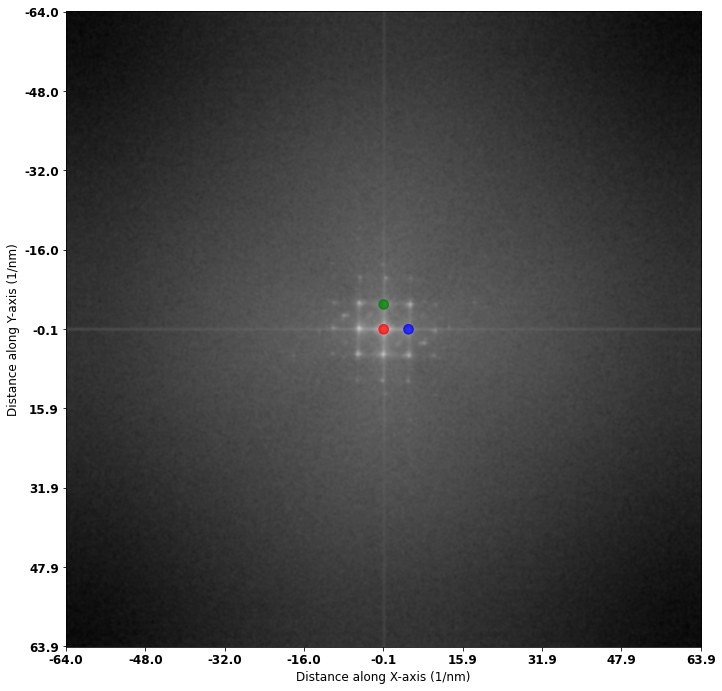

In [22]:
cc.find_spots((5, 0), (0, -5))

Choose your points in a clockwise fashion, or else you will get a wrong result


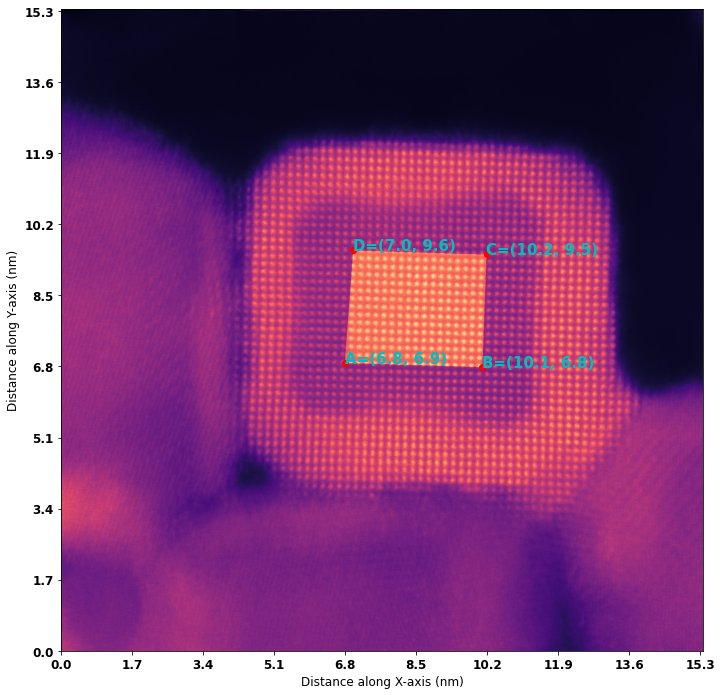

In [23]:
cc.define_reference((6.8, 6.9), (10.1, 6.8), (10.2, 9.5), (7.0, 9.6))

In [24]:
st.tic()
cc.refine_phase()
e_xx,e_yy,e_theta,e_diag = cc.get_strain()
st.toc()

Elapsed time: 62.320682 seconds.



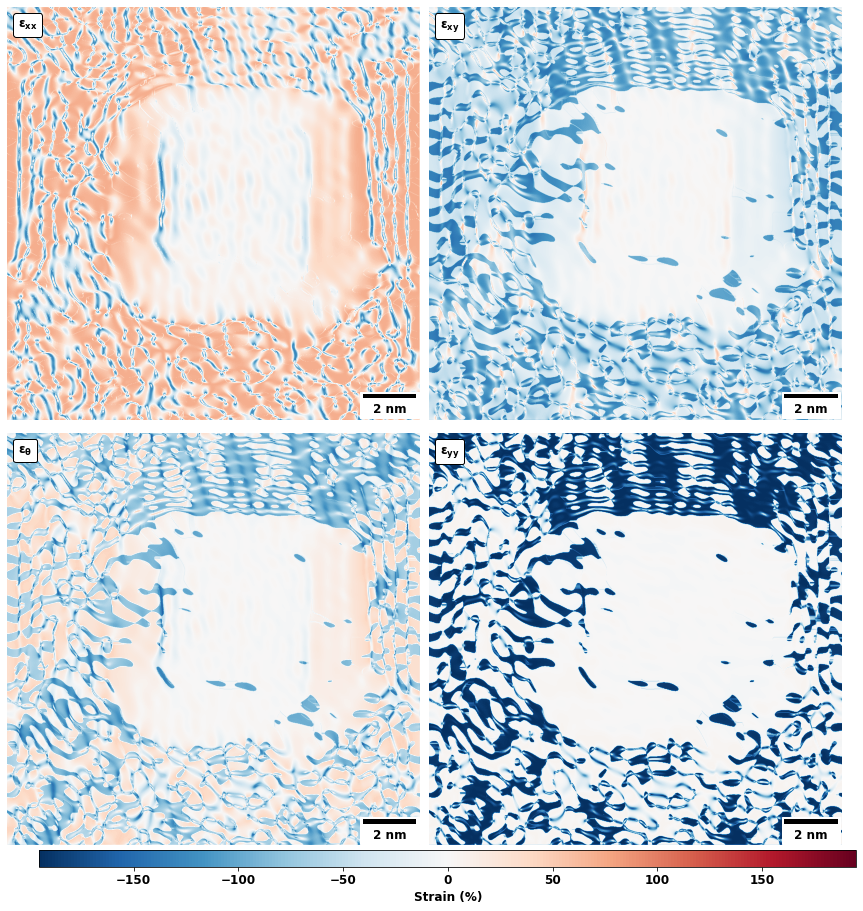

In [25]:
cc.plot_gpa_strain((12, 12))